In [1]:
import pandas as pd
import numpy as np
df = pd.read_json("Dataset for Detection of Cyber-Trolls.json",lines="True")
print(df.head(5))

                                             content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation  extras  
0  {'notes': '', 'label': ['1']}     NaN  
1  {'notes': '', 'label': ['1']}     NaN  
2  {'notes': '', 'label': ['1']}     NaN  
3  {'notes': '', 'label': ['1']}     NaN  
4  {'notes': '', 'label': ['1']}     NaN  


In [2]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

C:\Users\kaart\AppData\Local\Temp\ipykernel_19696\1367284056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 1
C:\Users\kaart\AppData\Local\Temp\ipykernel_19696\1367284056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0


In [3]:
df = df.rename(columns = {'content':'text'})
df.drop(['extras'],axis = 1,inplace = True)
df.head(5)

,text,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [4]:
df.shape

(20001, 2)

<Axes: >

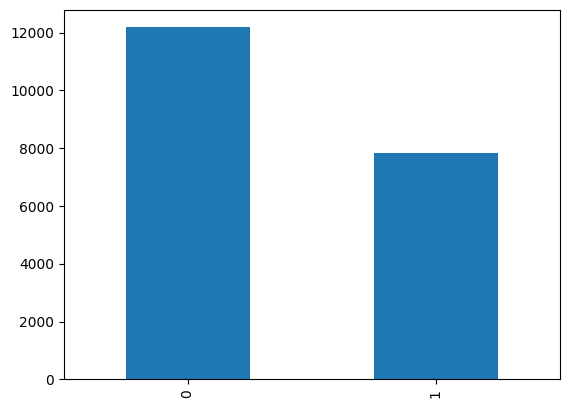

In [5]:

import matplotlib.pyplot as plt
df['annotation'].value_counts().sort_index().plot.bar()

In [6]:
# Count the number of 1's and 0's in the 'CB_Label' column
counts = df['annotation'].value_counts()

# Print the counts
print("Number of 1's:", counts[1])
print("Number of 0's:", counts[0])

Number of 1's: 7822
Number of 0's: 12179


In [7]:
# Calculate the bias ratio
label_counts = df["annotation"].value_counts()
bias_ratio = label_counts[1] / label_counts[0]

# Print the bias ratio
print("Bias ratio:", bias_ratio)


Bias ratio: 0.6422530585433943


In [8]:
print(df['annotation'].dtype)

object


In [9]:
unique_values = df['annotation'].unique()
print(unique_values)

[1 0]


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

df['annotation'] = df['annotation'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
df['annotation'] = label_encoder.fit_transform(df['annotation'])

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

# Define the SMOTE oversampler
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, df['annotation'])

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_resampled.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_resampled['annotation'] = y_resampled

# Check the class distribution after oversampling with SMOTE
class_counts_after = df_resampled['annotation'].value_counts()
print("\nClass distribution after oversampling with SMOTE:")
print(class_counts_after)


Class distribution after oversampling with SMOTE:
1    12179
0    12179
Name: annotation, dtype: int64


In [11]:
#!pip install nltk


You should consider upgrading via the 'C:\Users\Narayanan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

def preprocess_text(text):
    # Remove special characters and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join tokens back into sentence
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply preprocessing to content column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display the DataFrame with processed content
print(df[['text', 'processed_text']])


                                                    text  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                                          processed_text  
0                                     get fuck real dude  
1      dirti come crook rengel dem fuck corrupt joke ...  
2      fuck could day let hour ping later sched write...  
3      dude dont finish enclos fuck shower 

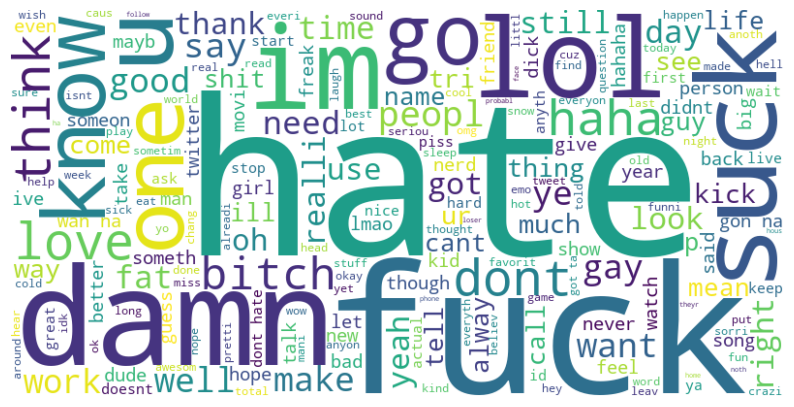

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize the processed_text column
tokenized_text = df['processed_text'].apply(lambda x: x.split())

# Combine all tokens into a single string
all_words = ' '.join([word for sublist in tokenized_text for word in sublist])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

df['annotation'] = df['annotation'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
df['annotation'] = label_encoder.fit_transform(df['annotation'])



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

# Define the SMOTE oversampler
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, df['annotation'])

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_resampled.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_resampled['annotation'] = y_resampled

# Check the class distribution after oversampling with SMOTE
class_counts_after = df_resampled['annotation'].value_counts()
print("\nClass distribution after oversampling with SMOTE:")
print(class_counts_after)



Class distribution after oversampling with SMOTE:
1    12179
0    12179
Name: annotation, dtype: int64


In [16]:
def read_keywords_from_file(file_path):
    with open(file_path, 'r') as file:
        keywords = [line.strip() for line in file]
    return keywords

# Example usage:
keywords = read_keywords_from_file('keywords.txt')  # Replace 'keywords.txt' with the path to your keywords file
print(keywords)


['1 man 1 jar', '1m1j', '1man1jar', '2 girls 1 cup', '2g1c', '2girls1cup', 'acrotomophile', 'acrotomophilia', 'alabama hot pocket', 'alabama tuna melt', 'alaskan pipeline', 'algophile', 'algophilia', 'anal', 'anal assassin', 'anal astronaut', 'anilingus', 'anus', 'ape shit', 'ape-shit', 'apeshit', 'apotemnophile', 'apotemnophilia', 'arse', 'arse bandit', 'arsehole', 'ass', 'ass bandit', 'asshole', 'auto erotic', 'autoerotic', 'babeland', 'baby batter', 'baby gravy', 'baby juice', 'ball batter', 'ball gag', 'ball gravy', 'ball kicking', 'ball licking', 'ball sack', 'ball sucking', 'ball-gag', 'ball-kicking', 'ball-licking', 'ball-sucking', 'ballcuzi', 'ballgag', 'bang bros', 'bang bus', 'bangbros', 'bangbus', 'bareback', 'barely legal', 'bastard', 'bastinado', 'batty boi', 'batty boy', 'battyboi', 'battyboy', 'bdsm', 'bean flicker', 'bean queen', 'bean-flicker', 'beaner', 'beaners', 'beanflicker', 'beastiality', 'beaver cleaver', 'beaver lips', 'beestiality', 'bellend', 'bellesa', 'best

In [17]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_keyword(keyword):
    # Lowercasing
    keyword = keyword.lower()

    # Tokenization
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(keyword)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_keyword = ' '.join(stemmed_tokens)

    return preprocessed_keyword

def remove_duplicates(keywords):
    unique_keywords = []
    duplicates = []
    processed_keywords = [preprocess_keyword(keyword) for keyword in keywords]
    for i, keyword in enumerate(processed_keywords):
        if keyword not in unique_keywords:
            unique_keywords.append(keyword)
        else:
            duplicates.append((keywords[i], keyword))  # Store original keyword along with its duplicate
    return unique_keywords, duplicates

# Example usage:
unique_keywords, duplicates = remove_duplicates(keywords)
print("Duplicates:")
for keyword, processed_keyword in duplicates:
    print(f"Original Keyword: {keyword}, Processed Keyword: {processed_keyword}")

# Remove duplicates from original list
for dup in duplicates:
    keywords.remove(dup[0])  # Remove original keyword

# Print number of unique words
print("Number of Unique Words:", len(unique_keywords))


Duplicates:
Original Keyword: ape-shit, Processed Keyword: ape shit
Original Keyword: ball-gag, Processed Keyword: ball gag
Original Keyword: ball-kicking, Processed Keyword: ball kick
Original Keyword: ball-licking, Processed Keyword: ball lick
Original Keyword: ball-sucking, Processed Keyword: ball suck
Original Keyword: bean-flicker, Processed Keyword: bean flicker
Original Keyword: beaners, Processed Keyword: beaner
Original Keyword: bitches, Processed Keyword: bitch
Original Keyword: blow-job, Processed Keyword: blow job
Original Keyword: bone-smuggler, Processed Keyword: bone smuggler
Original Keyword: booty-buffer, Processed Keyword: booti buffer
Original Keyword: brown showers, Processed Keyword: brown shower
Original Keyword: brown-piper, Processed Keyword: brown piper
Original Keyword: buddha-head, Processed Keyword: buddha head
Original Keyword: bull-shit, Processed Keyword: bull shit
Original Keyword: bum-boy, Processed Keyword: bum boy
Original Keyword: bum-chum, Processed

In [19]:
pip install wordcloud

You should consider upgrading via the 'C:\Users\Narayanan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


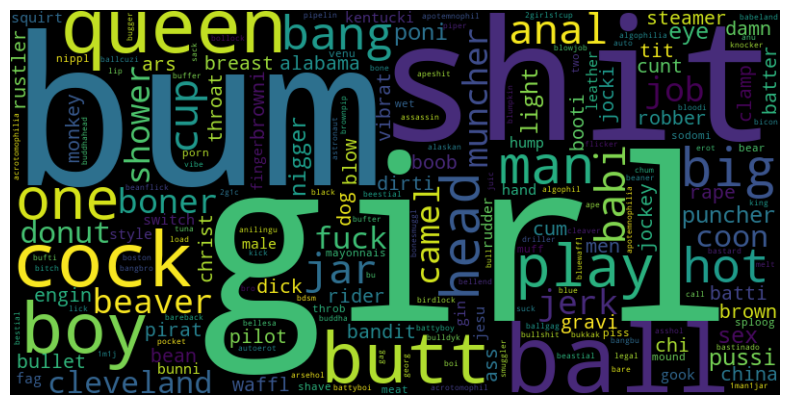

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(unique_keywords))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Narayanan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
# Filtering preprocessed text based on keywords
# Filtering preprocessed text based on keywords
df['Filtered_Text'] = df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word in unique_keywords]))

# Display filtered text
print("Filtered Text:")
print(df['Filtered_Text'])
# Add filtered text to the DataFrame
df['Filtered_Text'] = df['processed_text'].apply(lambda x: x if any(keyword in x for keyword in unique_keywords) else None)

# Display the DataFrame with filtered text
print("DataFrame with Filtered Text:")
print(df)


Filtered Text:
0        fuck
1        fuck
2        fuck
3        fuck
4            
         ... 
19996        
19997    piss
19998        
19999        
20000        
Name: Filtered_Text, Length: 20001, dtype: object
DataFrame with Filtered Text:
                                                    text  annotation  \
0                                 Get fucking real dude.           1   
1       She is as dirty as they come  and that crook ...           1   
2       why did you fuck it up. I could do it all day...           1   
3       Dude they dont finish enclosing the fucking s...           1   
4       WTF are you talking about Men? No men thats n...           1   
...                                                  ...         ...   
19996    I dont. But what is complaining about it goi...           0   
19997   Bahah  yeah i&;m totally just gonna&; get pis...           0   
19998       hahahahaha >:) im evil mwahahahahahahahahaha           0   
19999            What&;s someth

In [19]:
# Check for null values in the "Filtered_Text" column
null_values = df["Filtered_Text"].isnull().sum()

if null_values > 0:
    print("There are null values in the 'Filtered_Text' column.")
else:
    print("There are no null values in the 'Filtered_Text' column.")


There are null values in the 'Filtered_Text' column.


In [20]:
# Fill null values in the "Filtered_Text" column with an empty string
df["Filtered_Text"].fillna("", inplace=True)

# Define the function to determine the label
def determine_label(text):
    for keyword in unique_keywords:
        if keyword in text:
            return 1
    return 0

# Apply the function to create the new 'new_label' column
df["new_label"] = df["Filtered_Text"].apply(determine_label)

# Print the updated DataFrame
print(df)


                                                    text  annotation  \
0                                 Get fucking real dude.           1   
1       She is as dirty as they come  and that crook ...           1   
2       why did you fuck it up. I could do it all day...           1   
3       Dude they dont finish enclosing the fucking s...           1   
4       WTF are you talking about Men? No men thats n...           1   
...                                                  ...         ...   
19996    I dont. But what is complaining about it goi...           0   
19997   Bahah  yeah i&;m totally just gonna&; get pis...           0   
19998       hahahahaha >:) im evil mwahahahahahahahahaha           0   
19999            What&;s something unique about Ohio? :)           0   
20000              Who is the biggest gossiper you know?           0   

                                          processed_text  \
0                                     get fuck real dude   
1      dirti co

<Axes: >

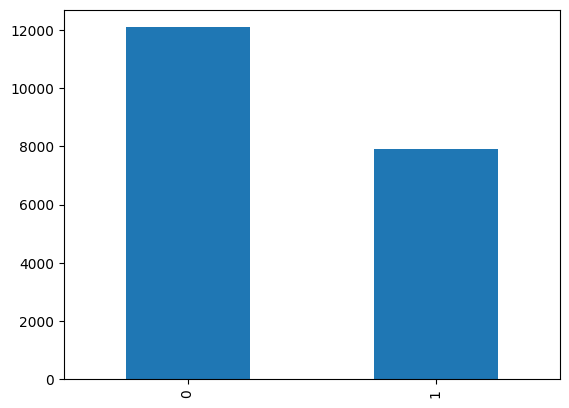

In [21]:
df['new_label'].value_counts().sort_index().plot.bar()

In [22]:
# Count the number of occurrences of each value in the "new_label" column
label_counts = df["new_label"].value_counts()

# Print the number of occurrences of 1 and 0
print("Number of 1s:", label_counts[1])
print("Number of 0s:", label_counts[0])


Number of 1s: 7911
Number of 0s: 12090


In [23]:
# Calculate the bias ratio
bias_ratio = label_counts[1] / label_counts[0]

# Print the bias ratio
print("Bias ratio:", bias_ratio)


Bias ratio: 0.6543424317617866


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['Filtered_Text'])

# Apply SMOTE to the TF-IDF transformed data
smote = SMOTE(random_state=42)
X_resampled_tfidf, y_resampled = smote.fit_resample(X_tfidf, df['new_label'])

# Check the class distribution in the resampled data
print(pd.Series(y_resampled).value_counts())


1    12090
0    12090
Name: new_label, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_tfidf, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (19344, 8649)
Testing set shape: (4836, 8649)


Random Forest Metrics:
Accuracy: 0.9977
Precision: 0.9977
Recall: 0.9977
F1-score: 0.9977

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2408
           1       1.00      1.00      1.00      2428

    accuracy                           1.00      4836
   macro avg       1.00      1.00      1.00      4836
weighted avg       1.00      1.00      1.00      4836



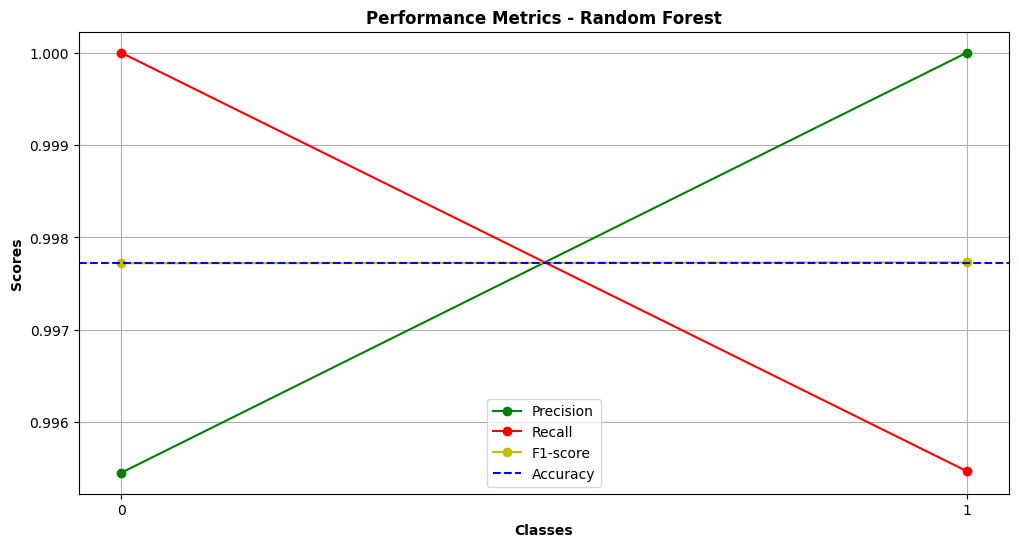

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics for plotting (for each class)
report_rf = classification_report(y_test, y_pred, output_dict=True)
precision_per_class_rf = [report_rf[label]['precision'] for label in report_rf.keys() if label.isdigit()]
recall_per_class_rf = [report_rf[label]['recall'] for label in report_rf.keys() if label.isdigit()]
f1_score_per_class_rf = [report_rf[label]['f1-score'] for label in report_rf.keys() if label.isdigit()]
classes_rf = [int(label) for label in report_rf.keys() if label.isdigit()]

# Plotting
plt.figure(figsize=(12, 6))

# Plot lines for precision, recall, and F1-score
plt.plot(classes_rf, precision_per_class_rf, marker='o', color='g', label='Precision')
plt.plot(classes_rf, recall_per_class_rf, marker='o', color='r', label='Recall')
plt.plot(classes_rf, f1_score_per_class_rf, marker='o', color='y', label='F1-score')
plt.axhline(y=accuracy_rf, color='b', linestyle='--', label='Accuracy')  # Plot horizontal line for accuracy

# Change x-labels to reflect class labels
plt.xticks(classes_rf)

# Add labels and title
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics - Random Forest', fontweight='bold')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()


SVM Metrics:
Accuracy: 0.9967
Precision: 0.9967
Recall: 0.9967
F1-score: 0.9967

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2408
           1       1.00      0.99      1.00      2428

    accuracy                           1.00      4836
   macro avg       1.00      1.00      1.00      4836
weighted avg       1.00      1.00      1.00      4836



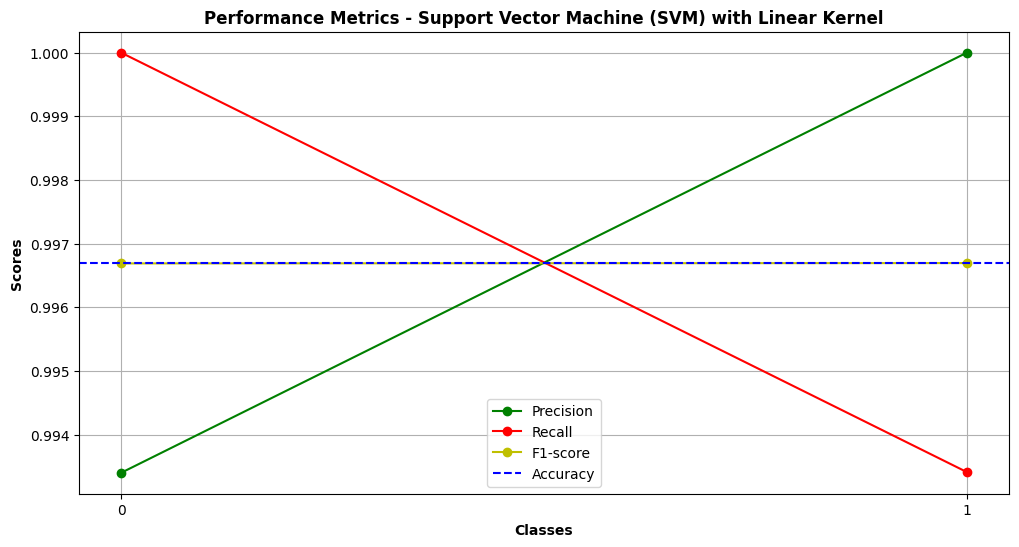

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print metrics
print("SVM Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

# Print classification report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Calculate metrics for plotting (for each class)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_per_class_svm = [report_svm[label]['precision'] for label in report_svm.keys() if label.isdigit()]
recall_per_class_svm = [report_svm[label]['recall'] for label in report_svm.keys() if label.isdigit()]
f1_score_per_class_svm = [report_svm[label]['f1-score'] for label in report_svm.keys() if label.isdigit()]
classes_svm = [int(label) for label in report_svm.keys() if label.isdigit()]

# Plotting
plt.figure(figsize=(12, 6))

# Plot lines for precision, recall, and F1-score
plt.plot(classes_svm, precision_per_class_svm, marker='o', color='g', label='Precision')
plt.plot(classes_svm, recall_per_class_svm, marker='o', color='r', label='Recall')
plt.plot(classes_svm, f1_score_per_class_svm, marker='o', color='y', label='F1-score')
plt.axhline(y=accuracy_svm, color='b', linestyle='--', label='Accuracy')  # Plot horizontal line for accuracy

# Change x-labels to reflect class labels
plt.xticks(classes_svm)

# Add labels and title
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics - Support Vector Machine (SVM) with Linear Kernel', fontweight='bold')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()


Logistic Regression Metrics:
Accuracy: 0.9824
Precision: 0.9830
Recall: 0.9824
F1-score: 0.9824

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2408
           1       1.00      0.96      0.98      2428

    accuracy                           0.98      4836
   macro avg       0.98      0.98      0.98      4836
weighted avg       0.98      0.98      0.98      4836



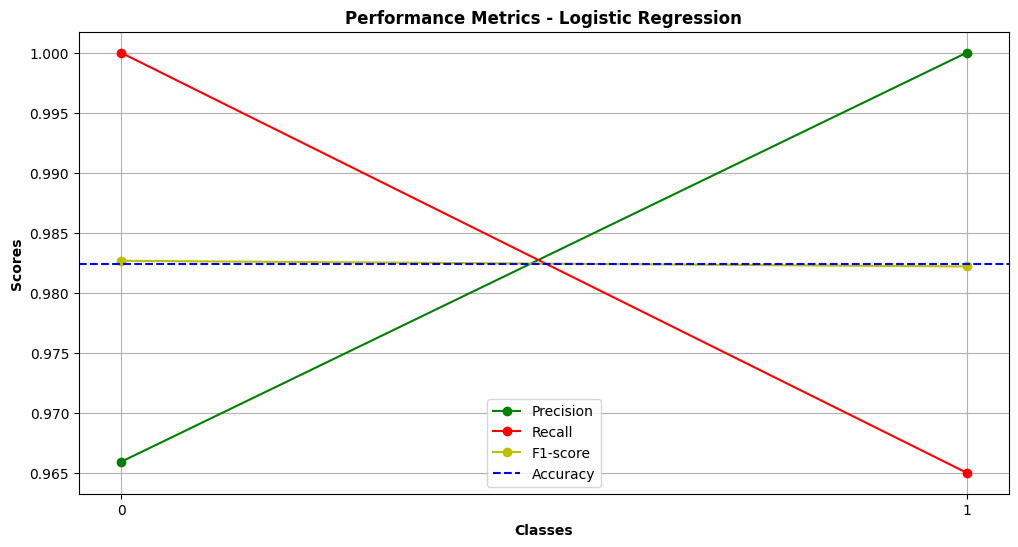

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier
lr_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_lr = lr_classifier.predict(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

# Print classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Calculate metrics for plotting (for each class)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_per_class_lr = [report_lr[label]['precision'] for label in report_lr.keys() if label.isdigit()]
recall_per_class_lr = [report_lr[label]['recall'] for label in report_lr.keys() if label.isdigit()]
f1_score_per_class_lr = [report_lr[label]['f1-score'] for label in report_lr.keys() if label.isdigit()]
classes_lr = [int(label) for label in report_lr.keys() if label.isdigit()]

# Plotting
plt.figure(figsize=(12, 6))

# Plot lines for precision, recall, and F1-score
plt.plot(classes_lr, precision_per_class_lr, marker='o', color='g', label='Precision')
plt.plot(classes_lr, recall_per_class_lr, marker='o', color='r', label='Recall')
plt.plot(classes_lr, f1_score_per_class_lr, marker='o', color='y', label='F1-score')
plt.axhline(y=accuracy_lr, color='b', linestyle='--', label='Accuracy')  # Plot horizontal line for accuracy

# Change x-labels to reflect class labels
plt.xticks(classes_lr)

# Add labels and title
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics - Logistic Regression', fontweight='bold')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()


X_train shape: (16000, 9000)
X_test shape: (4001, 9000)
y_train shape: (16000,)
y_test shape: (4001,)


C:\Users\kaart\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 635s 3s/step - accuracy: 0.9101 - loss: 0.2110 - val_accuracy: 0.9975 - val_loss: 0.0164
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - accuracy: 0.9979 - loss: 0.0172 - val_accuracy: 0.9975 - val_loss: 0.0162
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - accuracy: 0.9981 - loss: 0.0165 - val_accuracy: 0.9975 - val_loss: 0.0162
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.9981 - loss: 0.0153 - val_accuracy: 0.9975 - val_loss: 0.0191
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 629s 3s/step - accuracy: 0.9979 - loss: 0.0181 - val_accuracy: 0.9975 - val_loss: 0.0162
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.9987 - loss: 0.0110 - val_accuracy: 0.9975 - val_loss: 0.0167
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.9977 - loss: 0.0180 - val_accuracy: 0.9975 - val_loss: 0.0177
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 708s 3s/step - accuracy: 0.9977 - loss: 0.0195 - val_accu

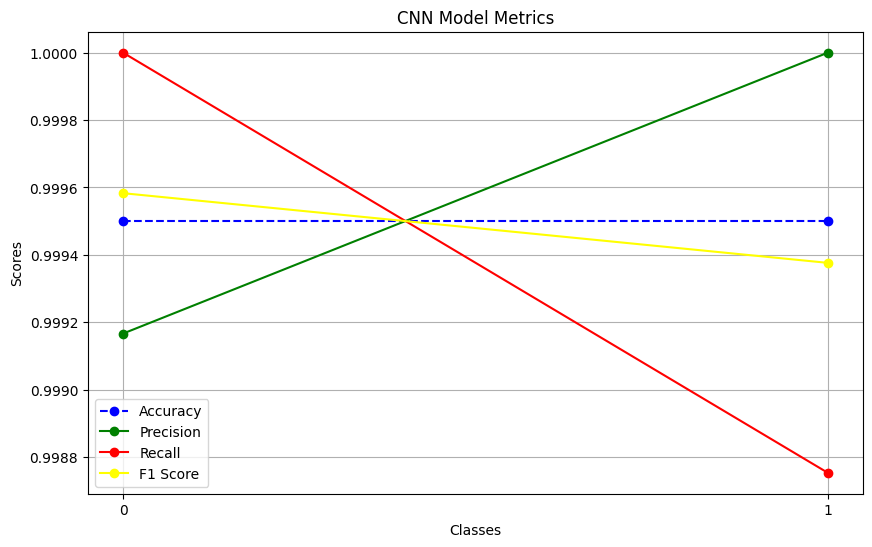

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming `df` DataFrame and `Filtered_Text`, `new_label` columns exist

# Tokenizing text and padding sequences
max_sequence_length = 9000 
vocab_size = 700  

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Filtered_Text'])

X_sequences = tokenizer.texts_to_sequences(df['Filtered_Text'])
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['new_label'], test_size=0.2, random_state=42)

# Check the shapes of the input data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Building the CNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_shape=(max_sequence_length,)),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Making predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generating classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
accuracy_0 = report['0']
accuracy_1 = report['1']
precision_0 = accuracy_0['precision']
precision_1 = accuracy_1['precision']
recall_0 = accuracy_0['recall']
recall_1 = accuracy_1['recall']
f1_0 = accuracy_0['f1-score']
f1_1 = accuracy_1['f1-score']

print("Accuracy:", accuracy)
print("Precision Class 0:", precision_0)
print("Precision Class 1:", precision_1)
print("Recall Class 0:", recall_0)
print("Recall Class 1:", recall_1)
print("F1 Score Class 0:", f1_0)
print("F1 Score Class 1:", f1_1)

# Plotting CNN model metrics
classes = ['0', '1']
metrics_accuracy = [accuracy, accuracy]  # Single accuracy value for both classes
metrics_precision = [precision_0, precision_1]
metrics_recall = [recall_0, recall_1]
metrics_f1 = [f1_0, f1_1]
colors = ['blue', 'green', 'red', 'yellow']
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))

plt.plot(classes, metrics_accuracy, marker='o', linestyle='--', color='blue', label='Accuracy')
plt.plot(classes, metrics_precision, marker='o', color='green', label='Precision')
plt.plot(classes, metrics_recall, marker='o', color='red', label='Recall')
plt.plot(classes, metrics_f1, marker='o', color='yellow', label='F1 Score')

plt.title('CNN Model Metrics')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)  # Adding grid
plt.show()


In [35]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Generating classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculating overall metrics
overall_accuracy = accuracy_score(y_test, y_pred)
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1 = f1_score(y_test, y_pred, average='weighted')

print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2397
           1       1.00      1.00      1.00      1604

    accuracy                           1.00      4001
   macro avg       1.00      1.00      1.00      4001
weighted avg       1.00      1.00      1.00      4001

Overall Accuracy: 0.9995001249687578
Overall Precision: 0.9995005417049239
Overall Recall: 0.9995001249687578
Overall F1 Score: 0.9995000732776456
